In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Generate synthetic data with outliers
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=10, size=100)  # Normal data points
outliers = np.random.normal(loc=15, scale=5, size=10)  # Outliers

data = np.concatenate((normal_data, outliers))  # Combine normal data with outliers

In [73]:
range_tot = list(range(len(data)))
range_1 = range_tot[:len(normal_data)]
range_2 = range_tot[len(normal_data):]

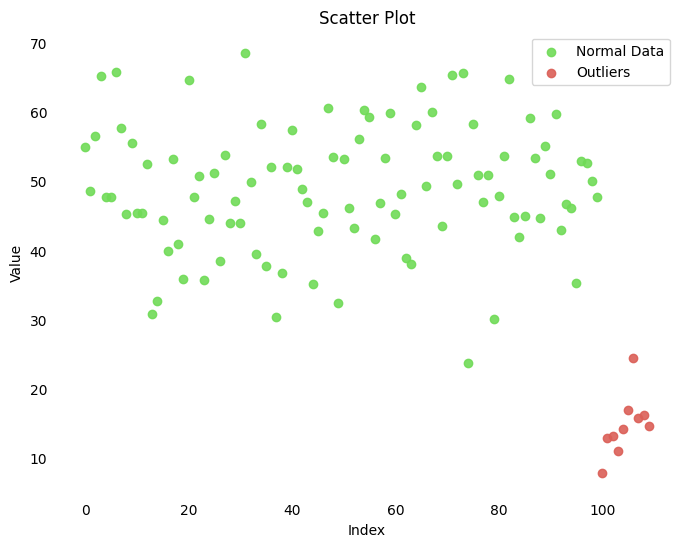

In [37]:
# Visualize data using a scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(range_1, normal_data, color=sns.color_palette("hls",24)[7], alpha=.9, label='Normal Data')
ax.scatter(range_2, outliers, color=sns.color_palette("hls",24)[0], alpha=.9, label='Outliers')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Scatter Plot')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.legend()
plt.savefig('scatter.png')

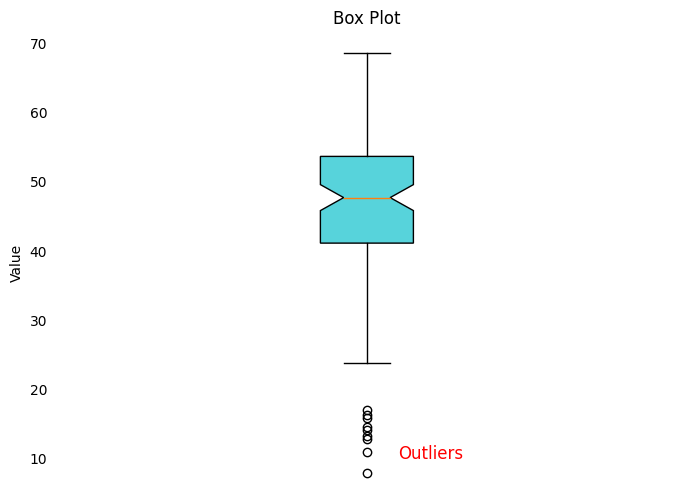

In [74]:
# Visualize data using a box plot
fig, ax = plt.subplots(figsize=(8, 6))
b_plot = ax.boxplot(data, vert=True, patch_artist=True, notch=True)
# ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Box Plot')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks([])
for box in b_plot['boxes']:
    box.set_facecolor(sns.color_palette("hls",24)[12])
ax.text(1.05, 10, 'Outliers', color='red', fontsize='large')
plt.savefig('box.png')

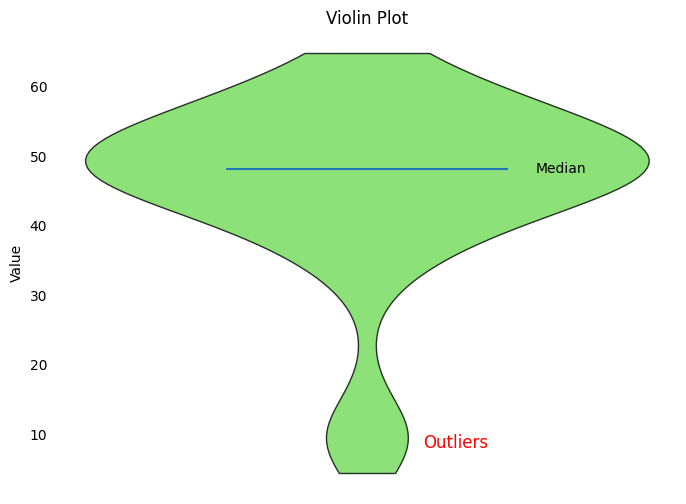

In [75]:
# Generate synthetic data with outliers
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=8, size=100)  # Normal data points
outliers = np.random.normal(loc=10, scale=4, size=10)  # Outliers

data = np.concatenate((normal_data, outliers))  # Combine normal data with outliers

# Visualize data using a violin plot
fig, ax = plt.subplots(figsize=(8, 6))
v_plot = ax.violinplot(data, vert=True, showmedians=True, showextrema=False)
# ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Violin Plot')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks([])
for pc in v_plot['bodies']:
    pc.set_facecolor(sns.color_palette("hls",24)[7])
    pc.set_edgecolor('black')
    pc.set_alpha(.8)
ax.text(1.05, 8, 'Outliers', color='red', fontsize='large')
ax.text(1.15, np.median(data)-0.5, 'Median', color='k', fontsize='medium')
plt.savefig('violin.png')

In [77]:
# Generate synthetic 2-dimensional data with outliers
np.random.seed(42)
# Normal data points
normal_data = np.random.normal(loc=50, scale=10, size=(100, 2))  
# Outliers
outliers = np.random.normal(loc=20, scale=5, size=(10, 2))  
# Combine normal data with outliers
data = np.vstack((normal_data, outliers))

# Create a DataFrame with synthetic data
df = pd.DataFrame({'Feature 1': data[:, 0], 'Feature 2': data[:, 1]})

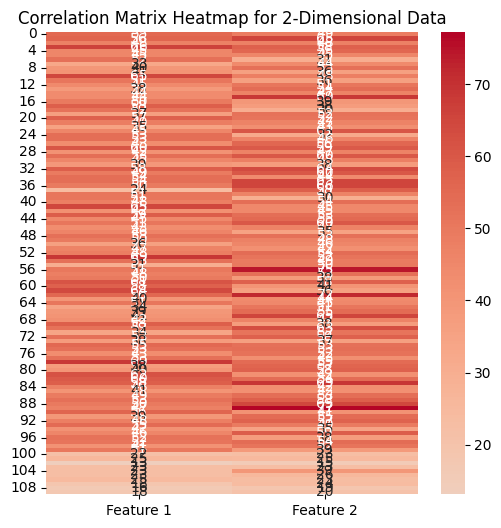

In [79]:
# Visualize correlation matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(df, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap for 2-Dimensional Data')
plt.show()

In [4]:
import numpy as np

# Generate a random dataset with outliers (100 normal points and 10 outliers)
np.random.seed(42)
data = np.concatenate((np.random.normal(loc=50, scale=10, size=100), 
                        np.random.normal(loc=110, scale=20, size=10)))

# Calculate mean and standard deviation
mean_data = np.mean(data)
std_dev = np.std(data)

# Set Z-score threshold (typically 2 or 3)
z_score_threshold = 2

# Identify outliers using Z-score
outliers_zscore = [value for value in data if (value - mean_data) / std_dev > z_score_threshold]
normal_zscore = [value for value in data if value not in outliers_zscore]

In [5]:
# Calculate Q1 and Q3
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calculate IQR
IQR = Q3 - Q1

# Set lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using IQR method
outliers_iqr = [value for value in data if value < lower_bound or value > upper_bound]
normal_iqr = [value for value in data if value not in outliers_iqr]

In [8]:
# Set lower and upper bounds for outliers
k=3
lower_bound_T = Q1 - k * IQR
upper_bound_T = Q3 + k * IQR

# Identify outliers using IQR method
outliers_T = [value for value in data if value < lower_bound_T or value > upper_bound_T]
normal_T = [value for value in data if value not in outliers_T]


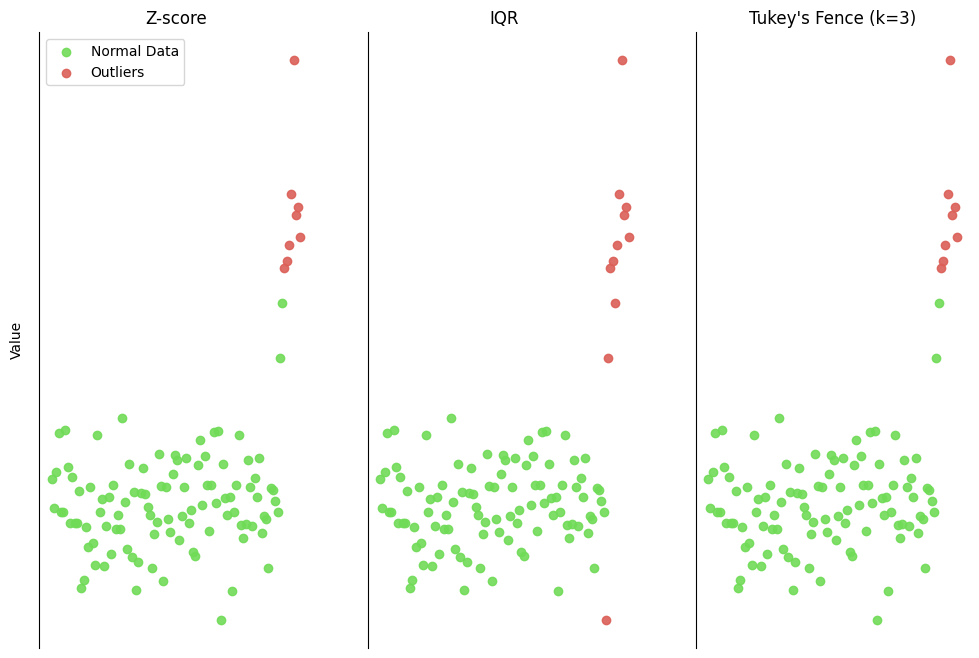

In [29]:
index = list(range(len(data)))

fig = plt.figure(figsize=(12   , 8))

# Z score
ax = fig.add_subplot(131)
ax.scatter(index[:len(normal_zscore)], normal_zscore, color=sns.color_palette("hls",24)[7], alpha=.9, label='Normal Data')
ax.scatter(index[len(normal_zscore):], outliers_zscore, color=sns.color_palette("hls",24)[0], alpha=.9, label='Outliers')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('Z-score')
ax.set_ylabel('Value')
plt.legend()

# iqr
ax = fig.add_subplot(132)
ax.scatter(index[:len(normal_iqr)], normal_iqr, color=sns.color_palette("hls",24)[7], alpha=.9, label='Normal Data')
ax.scatter(index[len(normal_iqr):], outliers_iqr, color=sns.color_palette("hls",24)[0], alpha=.9, label='Outliers')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('IQR')

# Tukey's Fence
ax = fig.add_subplot(133)
ax.scatter(index[:len(normal_T)], normal_T, color=sns.color_palette("hls",24)[7], alpha=.9, label='Normal Data')
ax.scatter(index[len(normal_T):], outliers_T, color=sns.color_palette("hls",24)[0], alpha=.9, label='Outliers')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title("Tukey's Fence (k=3)")

plt.savefig('statistical.png')

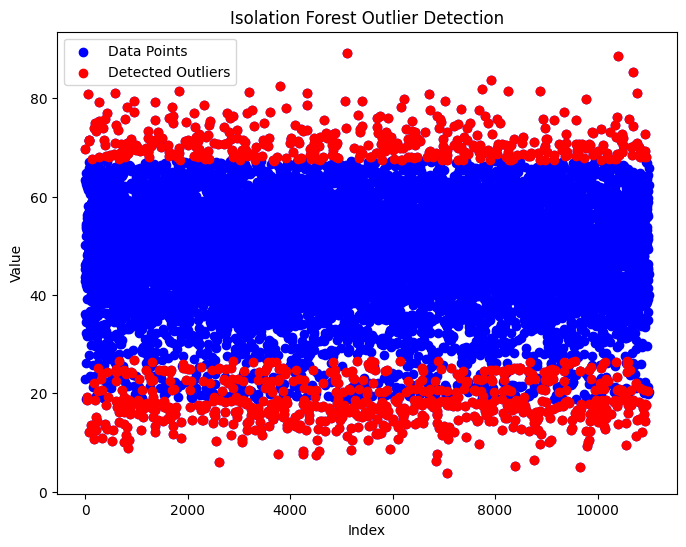

In [38]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with outliers
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=10, size=10000)
outliers = np.random.normal(loc=20, scale=5, size=1000)
data = np.concatenate((normal_data, outliers)).reshape(-1, 1)

np.random.shuffle(data)

# Apply Isolation Forest for outlier detection
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(data)

# Predict outliers
outlier_preds = clf.predict(data)
outliers_indices = np.where(outlier_preds == -1)

# Visualize the data and detected outliers
plt.figure(figsize=(8, 6))
plt.scatter(range(len(data)), data, color='b', label='Data Points')
plt.scatter(outliers_indices, data[outliers_indices], color='r', label='Detected Outliers')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Isolation Forest Outlier Detection')
plt.legend()
plt.show()

In [37]:
np.random.shuffle(data)
X_train = data[:7500]
X_train = data[7500:]